In [7]:
%matplotlib notebook
import numpy as np  # Fast numeric arrays/matrices (FITS files imported as numpy matrices)
from astropy.io import fits  # Reading/writing FITS data
import glob
import matplotlib.pyplot as plt
import cnPipeline as cp
import imexam

In [8]:
#viewer=imexam.connect()


In [9]:
#viewer=imexam.connect(viewer='ginga')

In [13]:
a=cp.cnH2rgRamps("data/slowdark*",readMode="SLOW",subArray=None,verbose=True)
#a=cp.cnH2rgRamps("data/plain*",readMode="SLOW",subArray=None,verbose=True)
# all data is in uint16
b=a.read()
c = a.quadfitKathleen(np.float32(b))


4 sequences of 20 frames found...
[['data/slowdark-150s-00012-00000.fits', 'data/slowdark-150s-00012-00001.fits', 'data/slowdark-150s-00012-00002.fits', 'data/slowdark-150s-00012-00003.fits', 'data/slowdark-150s-00012-00004.fits', 'data/slowdark-150s-00012-00005.fits', 'data/slowdark-150s-00012-00006.fits', 'data/slowdark-150s-00012-00007.fits', 'data/slowdark-150s-00012-00008.fits', 'data/slowdark-150s-00012-00009.fits', 'data/slowdark-150s-00012-00010.fits', 'data/slowdark-150s-00012-00011.fits', 'data/slowdark-150s-00012-00012.fits', 'data/slowdark-150s-00012-00013.fits', 'data/slowdark-150s-00012-00014.fits', 'data/slowdark-150s-00012-00015.fits', 'data/slowdark-150s-00012-00016.fits', 'data/slowdark-150s-00012-00017.fits', 'data/slowdark-150s-00012-00018.fits', 'data/slowdark-150s-00012-00019.fits'], ['data/slowdark-150s-00013-00000.fits', 'data/slowdark-150s-00013-00001.fits', 'data/slowdark-150s-00013-00002.fits', 'data/slowdark-150s-00013-00003.fits', 'data/slowdark-150s-00013-

(4, 20, 2048, 2048)


<IPython.core.display.Javascript object>


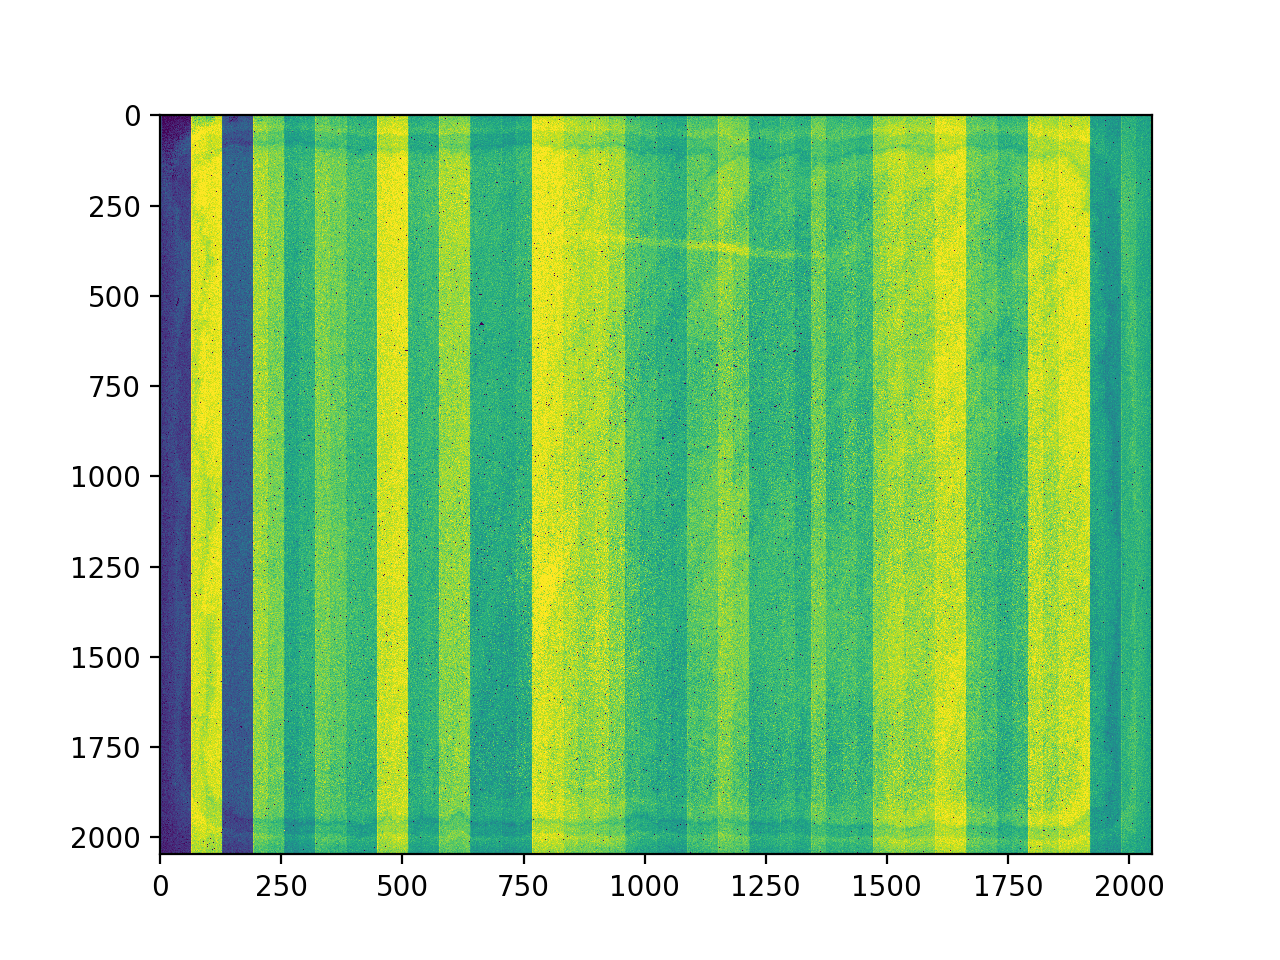

<IPython.core.display.Javascript object>


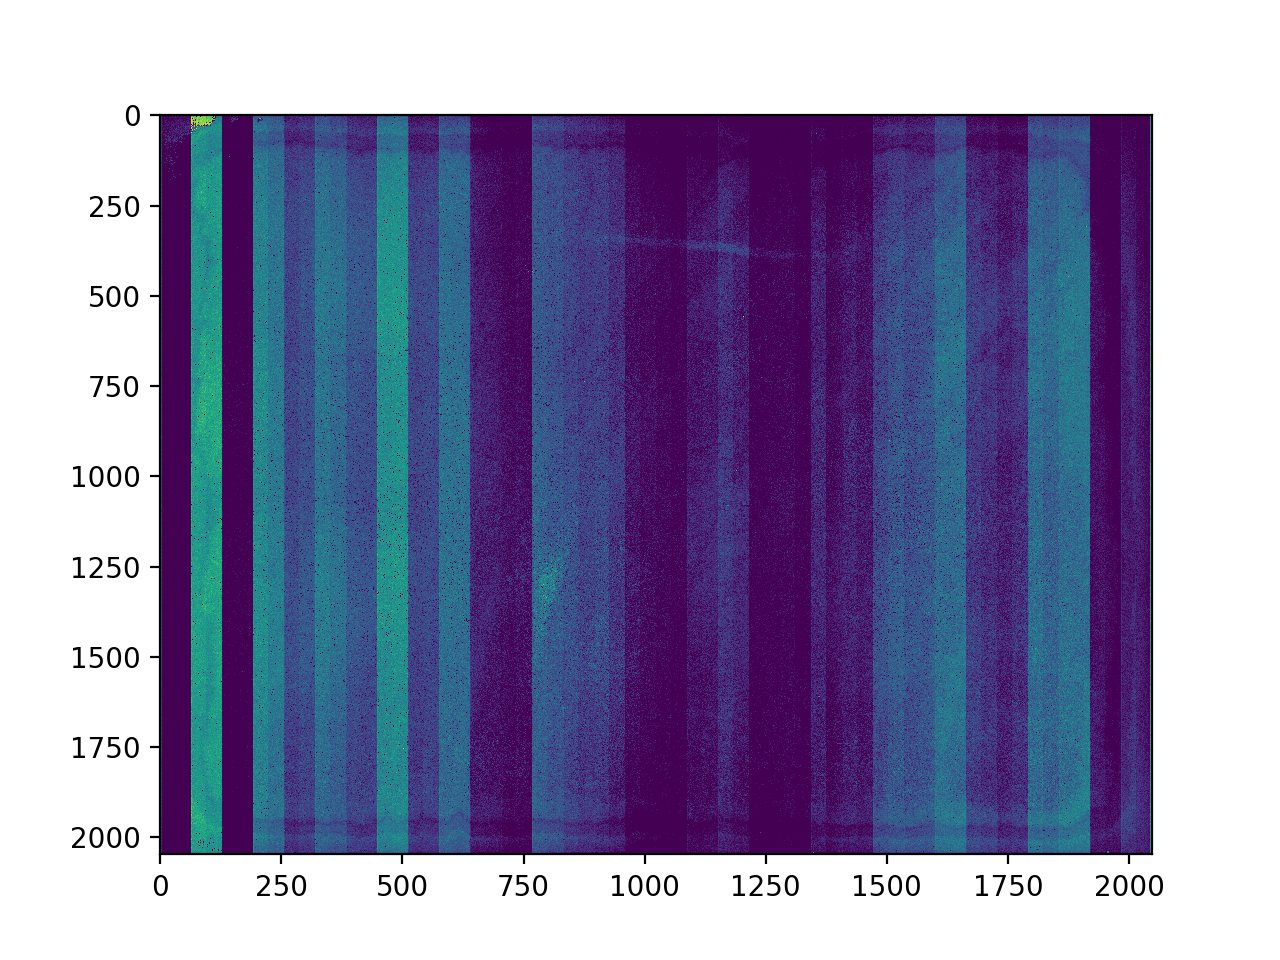

<IPython.core.display.Javascript object>


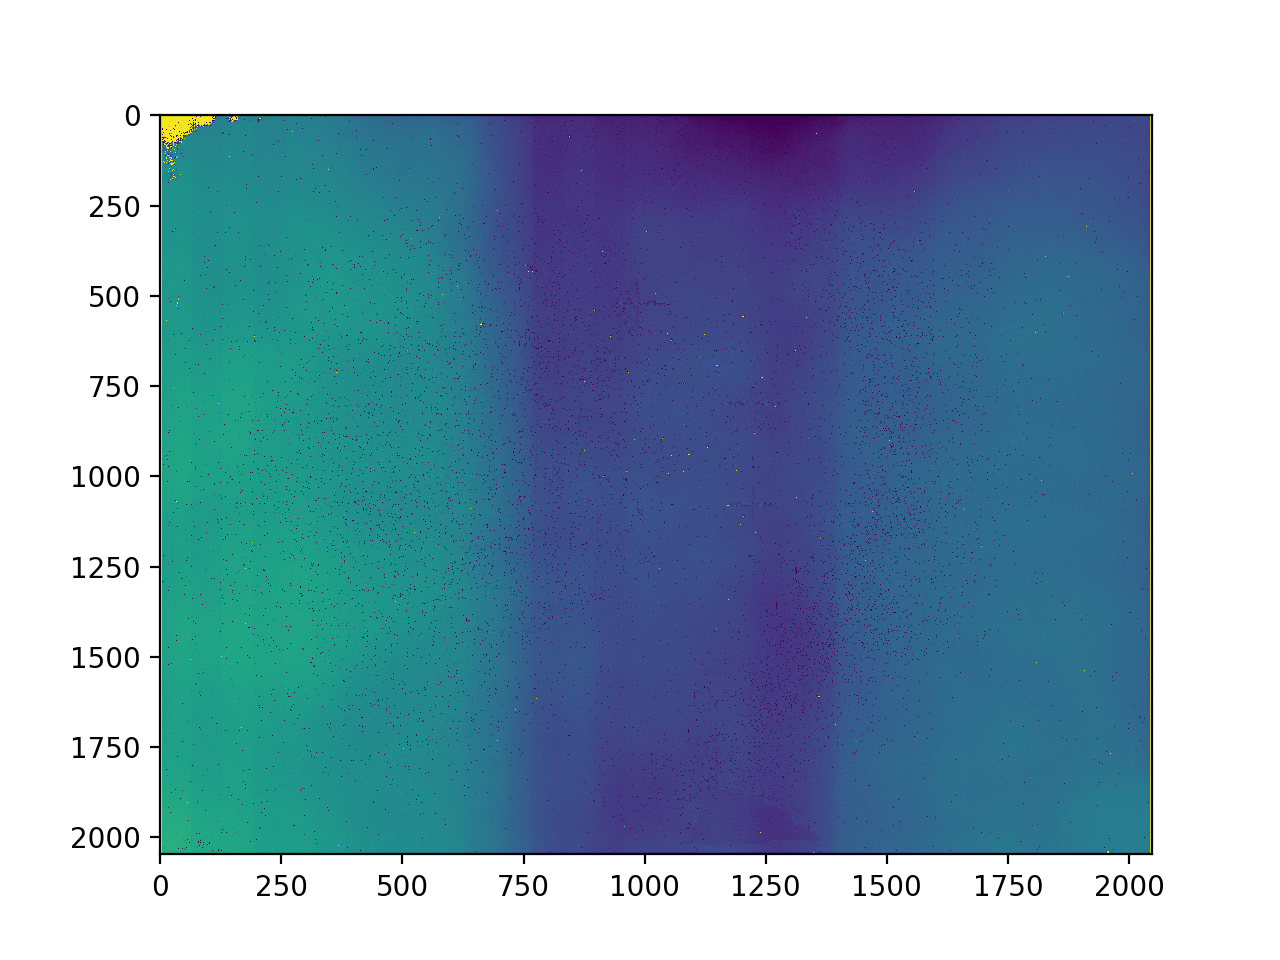

<IPython.core.display.Javascript object>


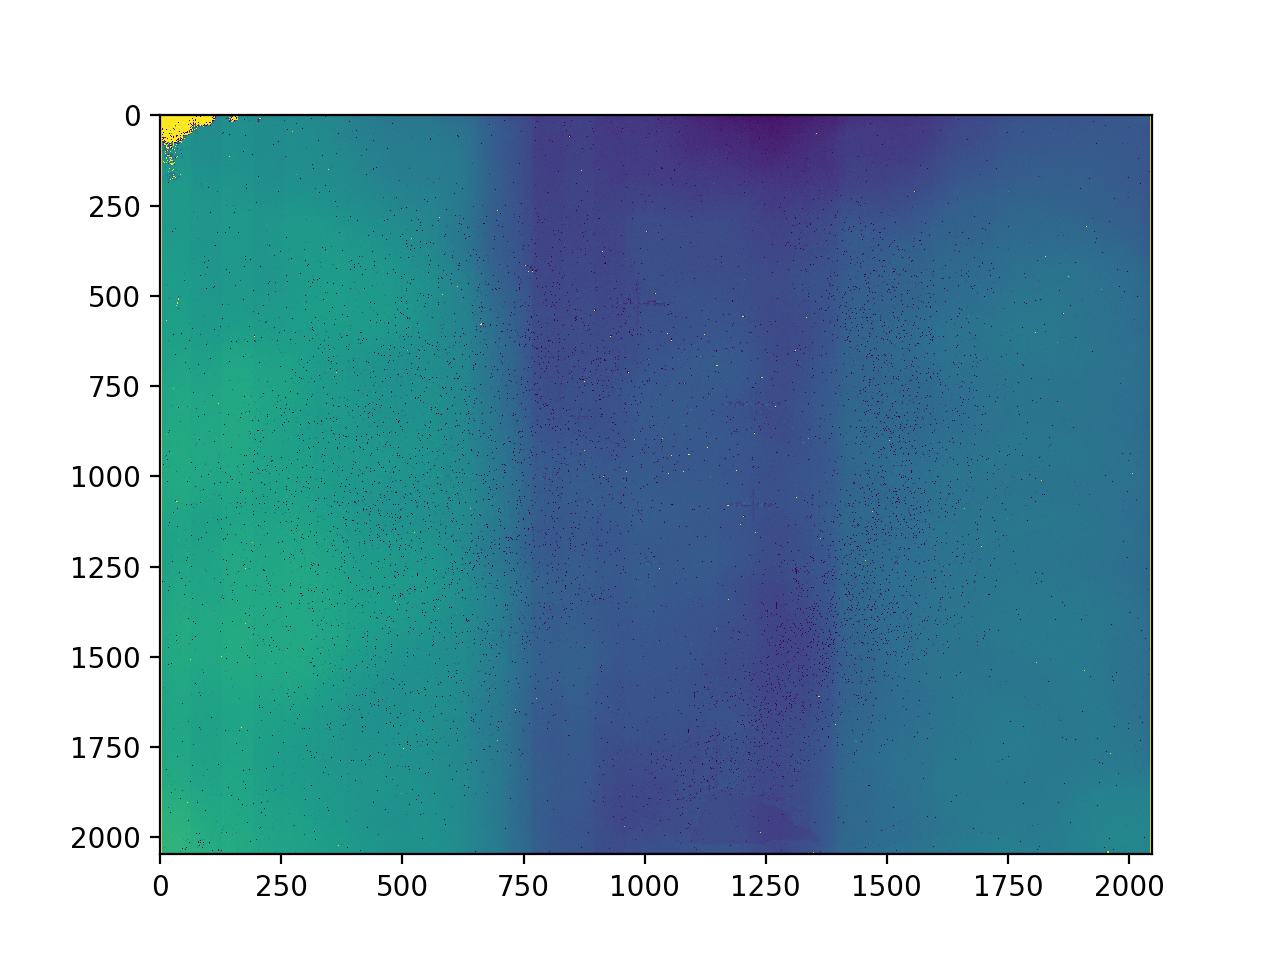

In [14]:
print(b.shape)
fig, ax=plt.subplots()
plt.imshow(b[0,0,:,:], aspect='auto',vmin=45000,vmax=52000)
fig, ax=plt.subplots()
plt.imshow(b[0,19,:,:], aspect='auto',vmin=45000,vmax=52000)
fig, ax=plt.subplots()
plt.imshow(np.float32(b[0,19,:,:])-np.float32(b[0,0,:,:]), aspect='auto',vmin=-6000,vmax=0)
fig, ax=plt.subplots()
plt.imshow(np.float32(b[0,19,:,:])-np.float32(b[0,1,:,:]), aspect='auto',vmin=-6000,vmax=0)
plt.show()

(4, 2048, 2048)


<IPython.core.display.Javascript object>


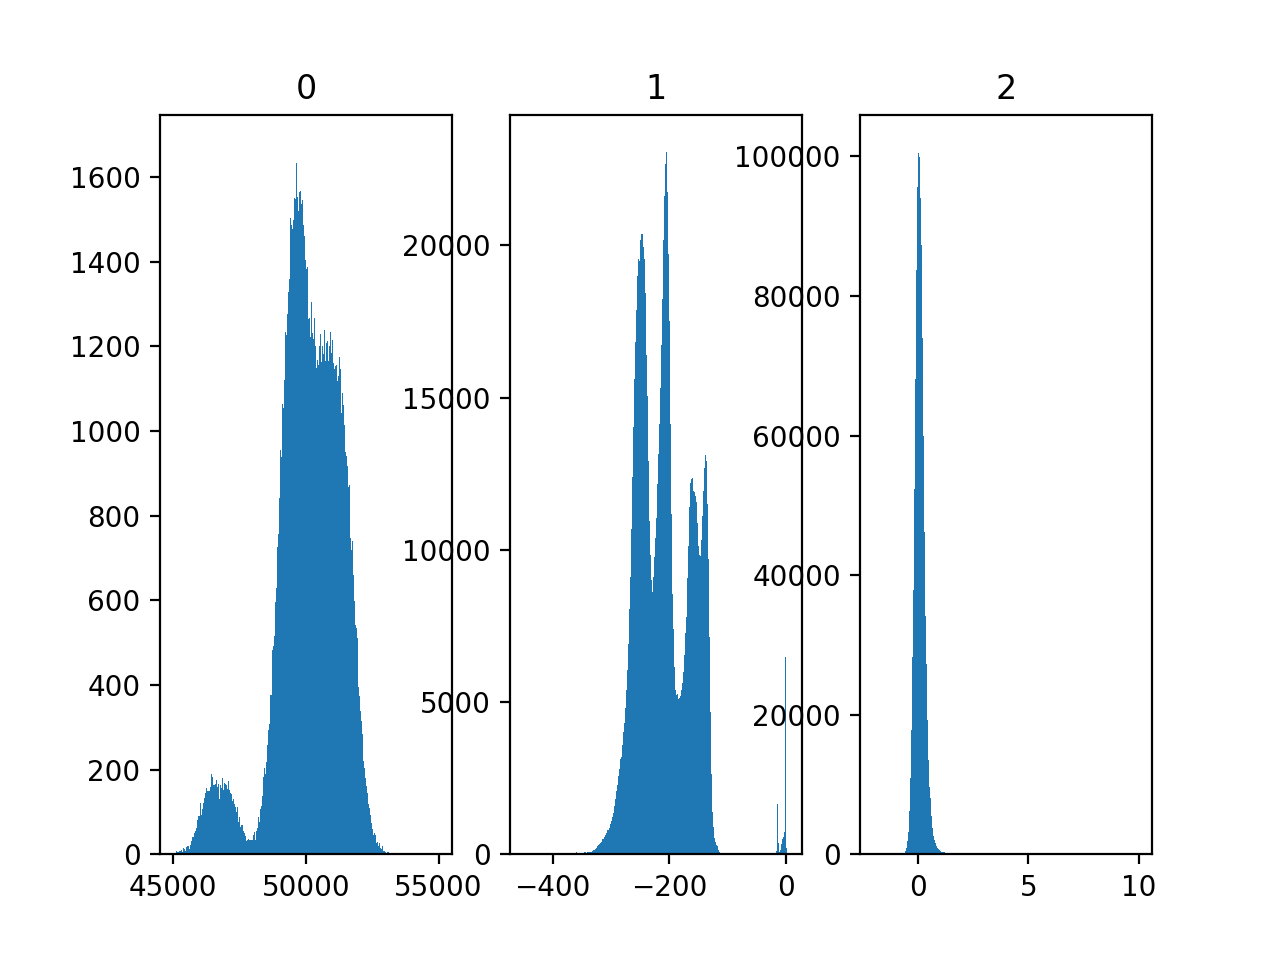

49711.4711471
-205.665
0.052


In [15]:
print(c[0].shape)
wo = 0

#for slow mode we expect for raw data a negative slope c[1] and a positive quadratic term c[2]

fig, ax=plt.subplots(1,3)
plt.subplot(1,3,1,title=str(0))
x,y, _ = plt.hist(np.ndarray.flatten(c[0][wo]),bins=9999, range=[45000.,55000.])
elem = np.argmax(x)
print(y[elem])
plt.subplot(1,3,2,title=str(1))
x,y, _ = plt.hist(np.ndarray.flatten(c[1][wo]),bins=1000, range=[-450.,5.])
elem = np.argmax(x)
print(y[elem])
plt.subplot(1,3,3,title=str(2))
x,y, _ = plt.hist(np.ndarray.flatten(c[2][wo]),bins=1000, range=[-2.,10.])
elem = np.argmax(x)
print(y[elem])
plt.show()

<IPython.core.display.Javascript object>


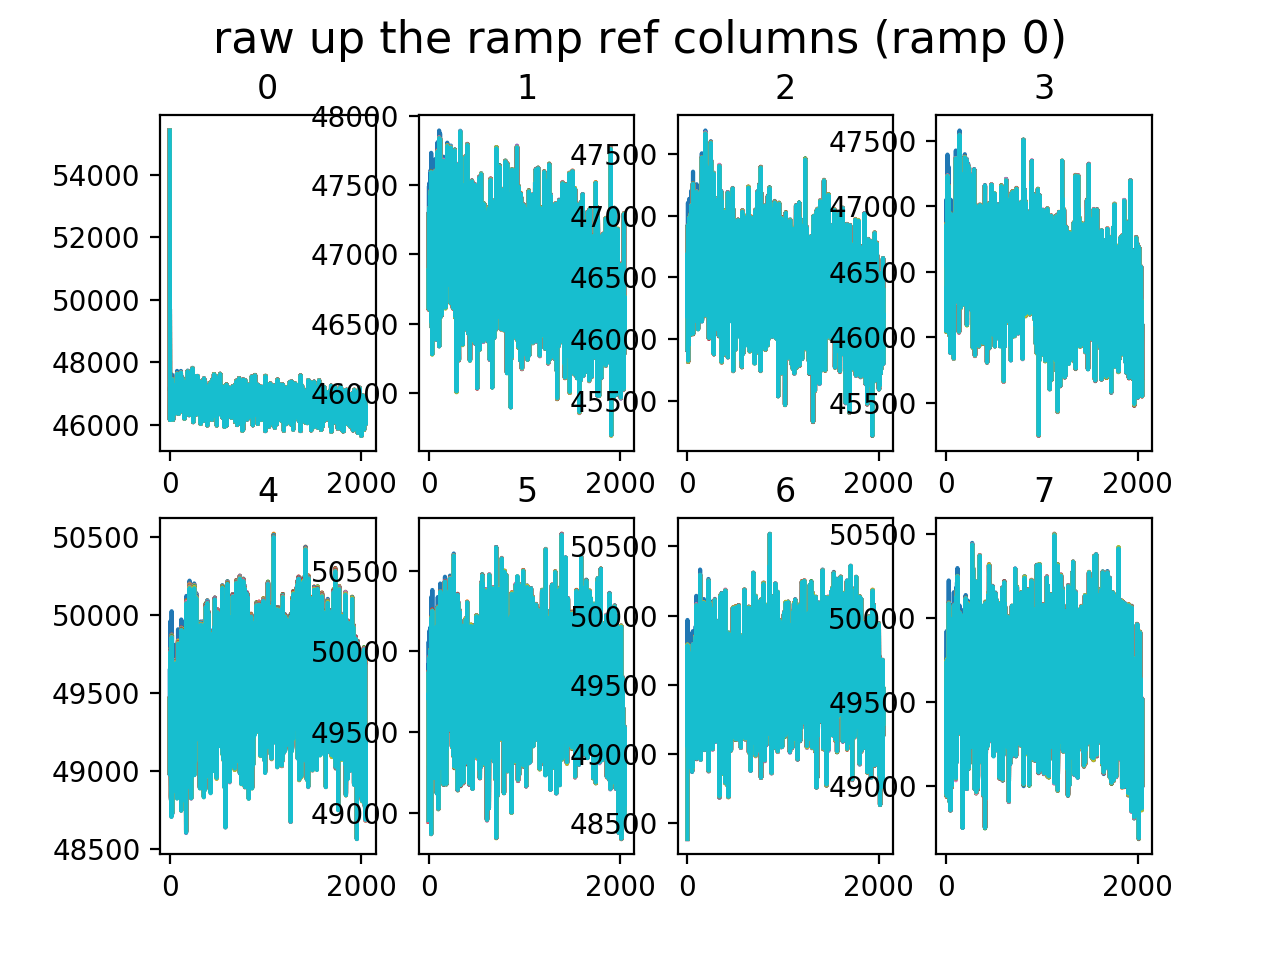

<IPython.core.display.Javascript object>


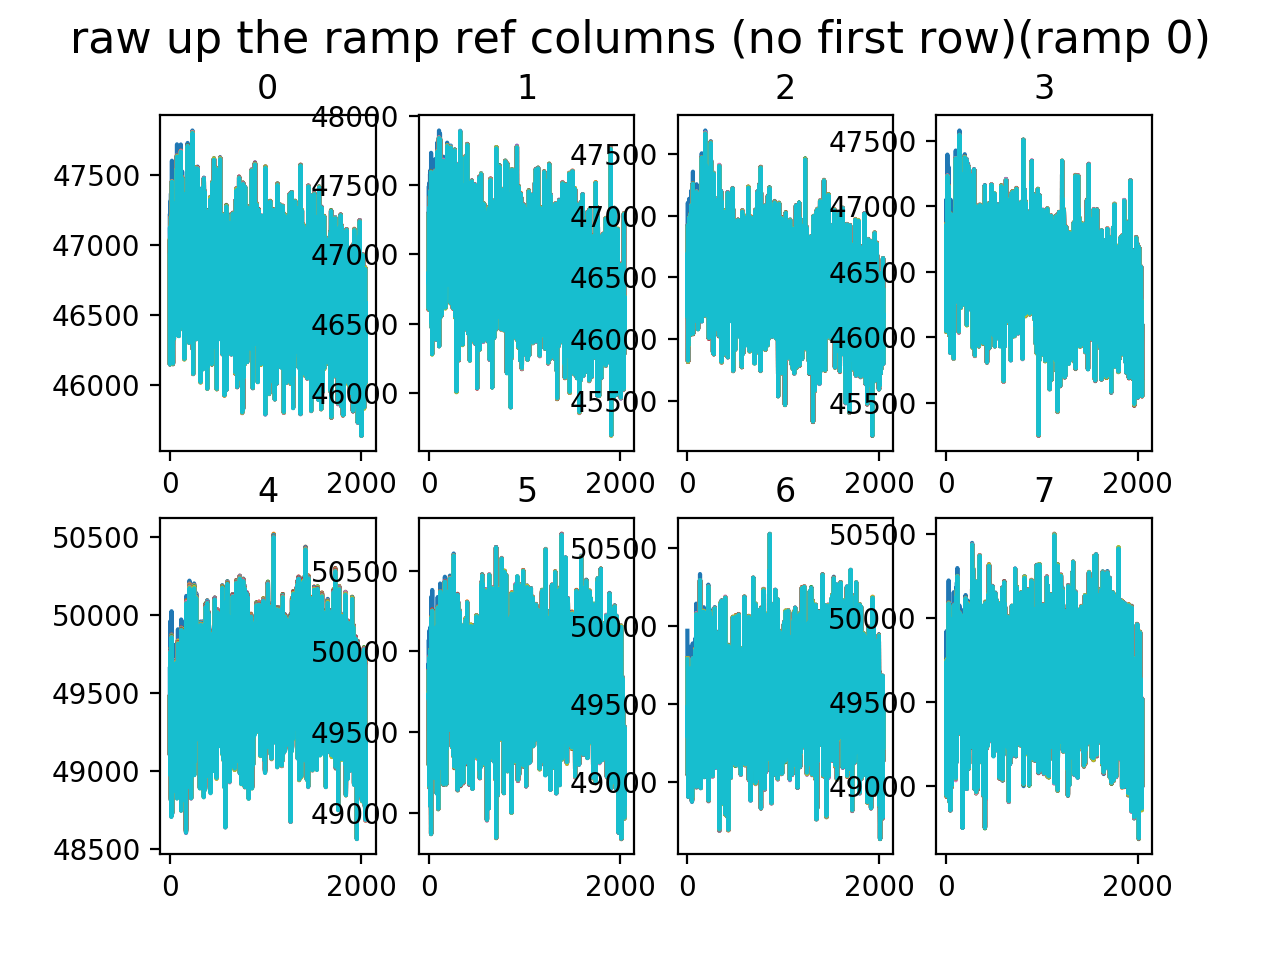

<IPython.core.display.Javascript object>


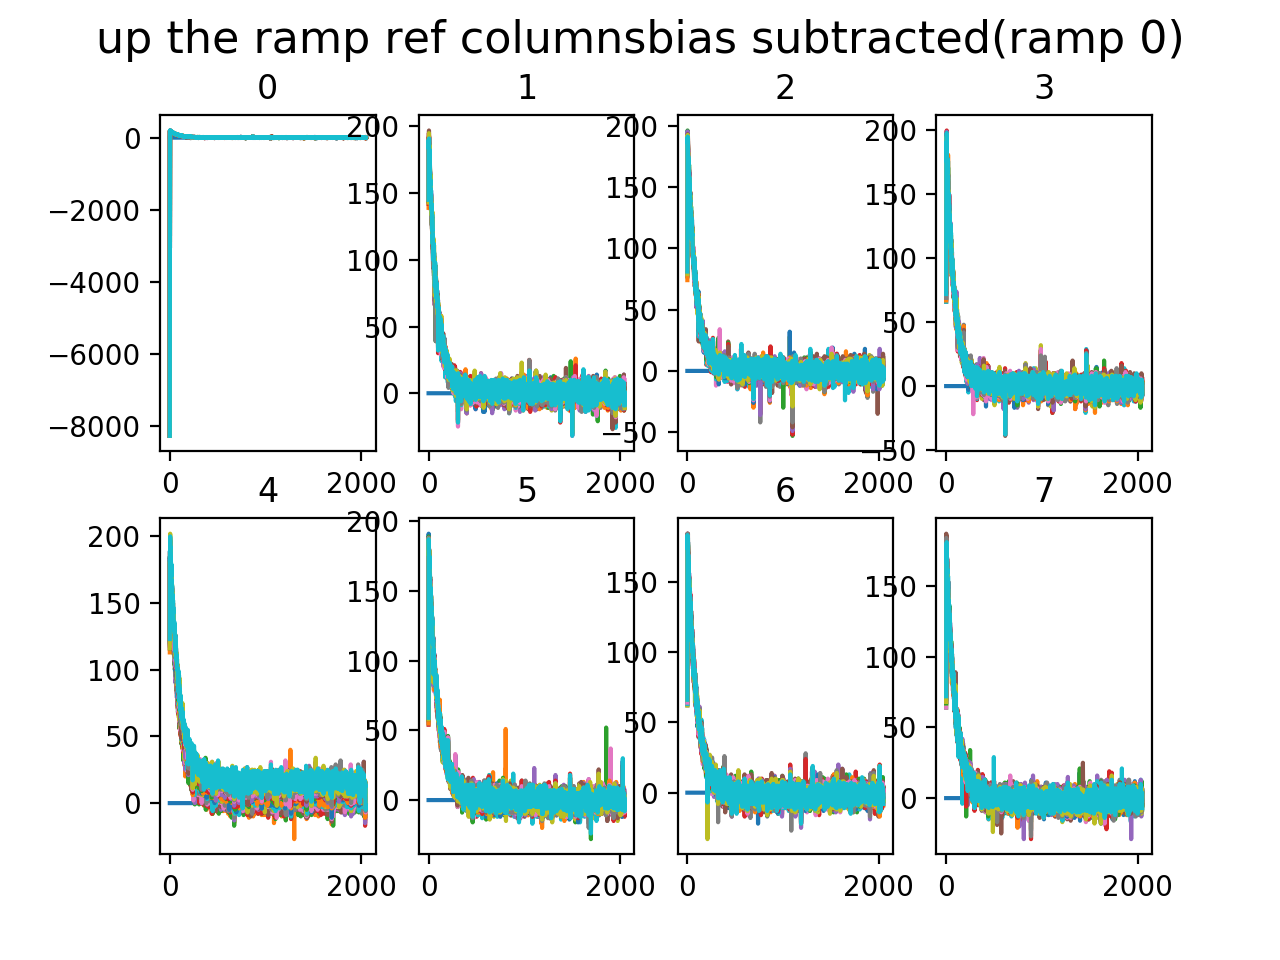

<IPython.core.display.Javascript object>


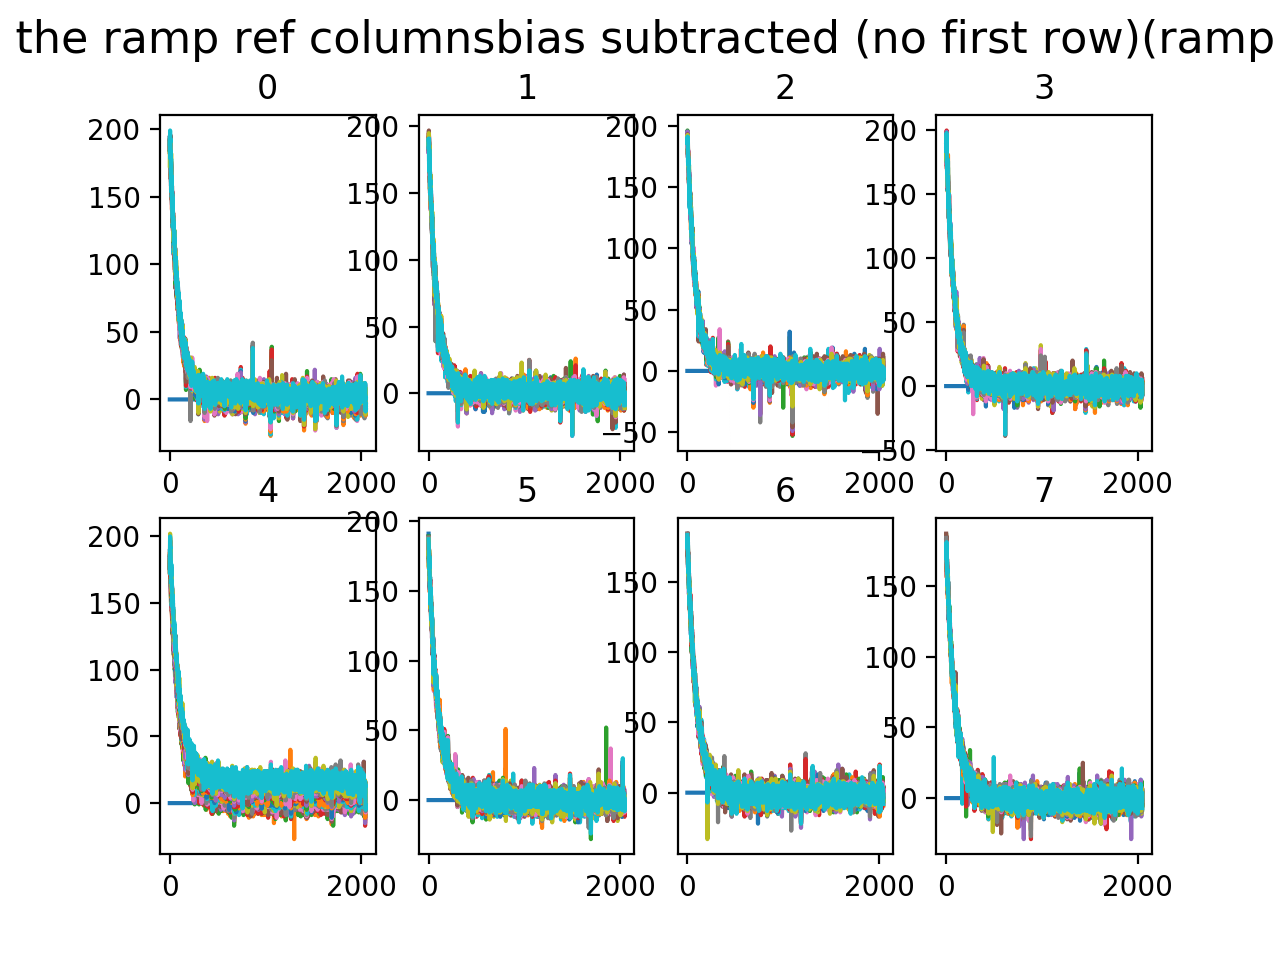

<IPython.core.display.Javascript object>


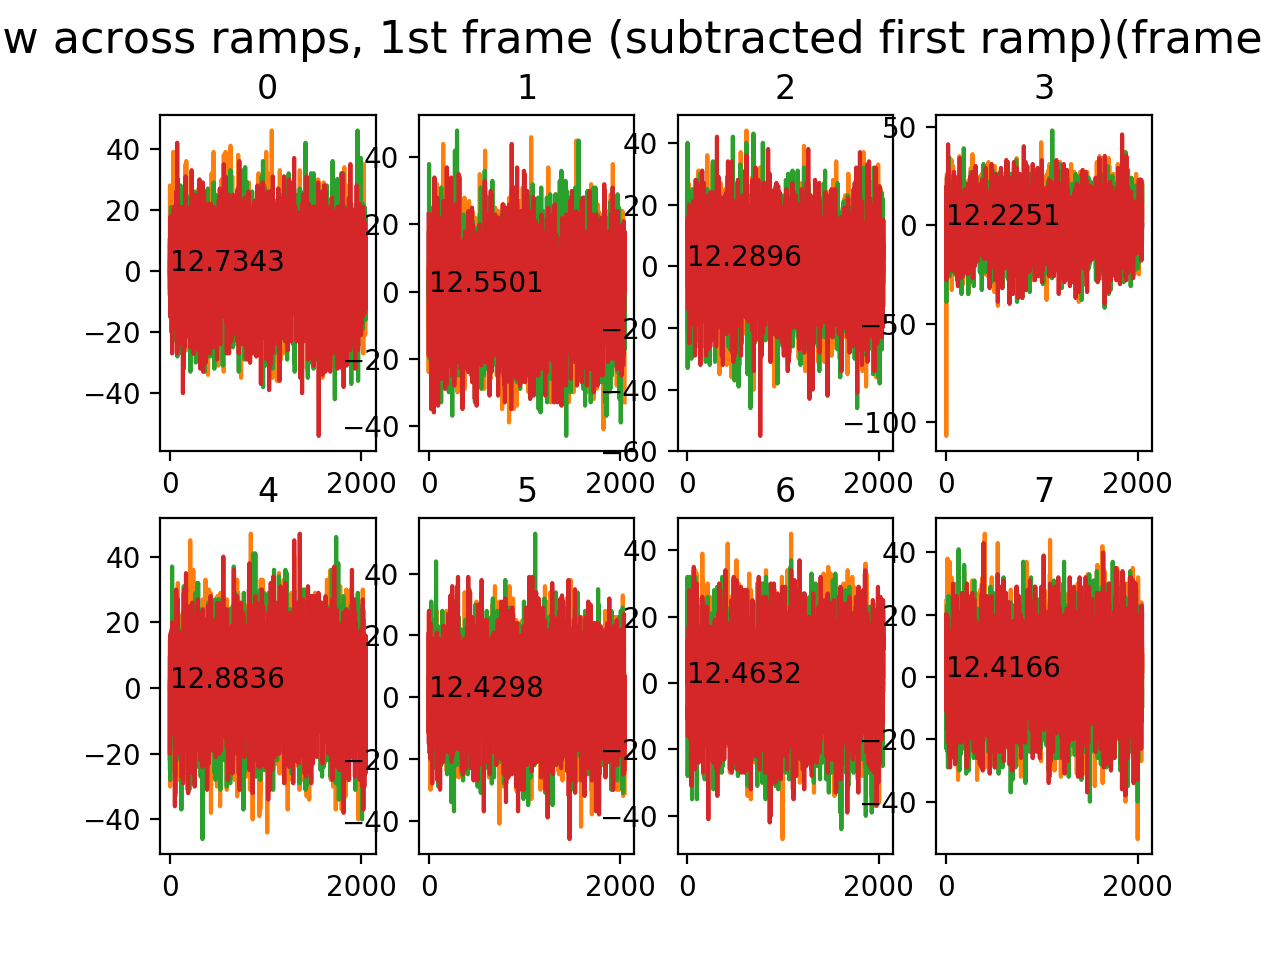

In [16]:


#t=b[0,:,:,:4]
refCol = np.concatenate((b[:,:,:,:4],b[:,:,:,-4:]),axis=3)
refRow = np.concatenate((b[:,:,:4,:],b[:,:,-4:,:]),axis=2)

refColSubtracted= -1.*(np.float32(refCol)-np.expand_dims(np.float32(refCol[:,0,:,:]),axis=1))

# investigate reference pixels
# look at up the ramp raw reference columns
ramp = 0
fig, ax=plt.subplots(2,4)
fig.suptitle("raw up the ramp ref columns (ramp "+str(ramp)+")", fontsize=16)
for i in range(8):
  plt.subplot(2,4,i+1,title=str(i))
  plt.plot(refCol[ramp,:,:,i].T)

fig, ax=plt.subplots(2,4)
fig.suptitle("raw up the ramp ref columns (no first row)(ramp "+str(ramp)+")", fontsize=16)
for i in range(8):
  plt.subplot(2,4,i+1,title=str(i))
  plt.plot(refCol[ramp,:,1:,i].T)


# look at up the ramp reference columns bias subtracted
fig, ax=plt.subplots(2,4)
fig.suptitle("up the ramp ref columnsbias subtracted(ramp "+str(ramp)+")", fontsize=16)
for i in range(8):
  plt.subplot(2,4,i+1,title=str(i))
  plt.plot(refColSubtracted[ramp,:,:,i].T)

fig, ax=plt.subplots(2,4)
fig.suptitle("up the ramp ref columnsbias subtracted (no first row)(ramp "+str(ramp)+")", fontsize=16)
for i in range(8):
  plt.subplot(2,4,i+1,title=str(i))
  plt.plot(refColSubtracted[ramp,:,1:,i].T)

refCol = np.concatenate((b[:,:,:,:4],b[:,:,:,-4:]),axis=3)
refColSubtracted= -1.*(np.float32(refCol)-np.float32(refCol[0,:,:,:]))

# look at raw reference columns accross ramps
frame = 1
fig, ax=plt.subplots(2,4)
fig.suptitle("raw across ramps, 1st frame (subtracted first ramp)(frame "+str(frame)+")", fontsize=16)
for i in range(8):
  plt.subplot(2,4,i+1,title=str(i))
  plt.text(1,0,str(np.std(refColSubtracted[1,frame,:,i])))
  plt.plot(refColSubtracted[:,frame,:,i].T)


In [ ]:
# average dark series
av = np.mean(np.float32(b),axis=0)

In [ ]:
print(av.shape)
fig, ax=plt.subplots()
plt.imshow(av[0,:,:], aspect='auto',vmin=45000,vmax=52000)
fig, ax=plt.subplots()
plt.imshow(av[19,:,:], aspect='auto',vmin=45000,vmax=52000)
fig, ax=plt.subplots()
plt.imshow(av[19,:,:]-av[0,:,:], aspect='auto',vmin=-6000,vmax=0)
fig, ax=plt.subplots()
plt.imshow(av[19,:,:]-av[1,:,:], aspect='auto',vmin=-6000,vmax=0)
plt.show()